**Analysis Cluster Sistem Penjaminan Mutu Internal di Lembaga Layanan pendidikan Tinggi Wilayah 4**



<img src="https://raw.githubusercontent.com/lldikti4/lldikti4.github.io/main/dasboard.jpeg">

Penelitian ini berfokus pada analisis klaster untuk memahami variasi dalam implementasi Sistem Penjaminan Mutu Internal (SPMI) di perguruan tinggi yang berada di bawah Wilayah LLDIKTI 4. Pentingnya Sistem Penjaminan Mutu Internal (SPMI) untuk memastikan bahwa pendidikan tinggi di perguruan tinggi mencapai dan mempertahankan standar kualitas yang telah ditetapkan. Di wilayah LLDIKTI 4, berbagai perguruan tinggi memiliki karakteristik dan sumber daya yang berbeda, sehingga implementasi SPMI dapat bervariasi.


   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>   

1. Importing Libraries
2. Loading Data
3. Data Cleaning
4. Data Preprocessing
5. Dimensionality Reduction
6. Determining Optimal Number of Clusters
7. Clustering Algorithms
    a. K-Means
    b. Mean Shift
    c. DBSCAN
8. Visualization of Clustering Results
9. Model Evaluation
10. Comparison of Clustering Algorithms
11. Conclusion

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">IMPORTING LIBRARIES</p>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, MeanShift, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

ModuleNotFoundError: No module named 'pandas'

In [ ]:
import pandas as pd

# Ganti 'path_to_file.csv' dengan path ke file CSV Anda
df = pd.read_csv('/Users/resarianti/Documents/TA/machinelearing/datasets/data spmi.csv')

# Menampilkan beberapa baris pertama dari DataFrame
print(df.head())


<a id="2"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">LOADING DATA</p>

In [ ]:
#Loading the dataset
data = pd.read_csv('/content/drive/MyDrive/data spmi.csv')
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 496


,KODEPT,PT,tutup,KEBIJAKAN_UNGGAH,KEBIJAKAN_VERIFIED,KEBIJAKAN_VALID,STANDAR_INSTITUSI_UNGGAH,STANDAR_INSTITUSI_VERIFIED,STANDAR_INSTITUSI_VALID,JML_STDLAIN_VALID,...,PENINGKATAN_UNGGAH,PENINGKATAN_VERIFIED,PENINGKATAN_VALID,BOBOT VALID,KETERANGAN VALID,BOBOT VERIFIKASI,KETERANGAN,BOBOT UNGGAH,KETERANGAN.1,KLASTER
0,44002,Akademi Akuntansi Bandung,NaN,6,5,1,10,10,8,0,...,6,0,0,29%,Belum Tervalidasi,46%,Belum Terverifikasi,100%,Sudah Unggah,Merah
1,44132,Akademi Analis Kesehatan An Nasher Cirebon,NaN,6,6,0,8,8,0,0,...,0,0,0,0%,Tidak Ada,40%,Belum Terverifikasi,40%,Tidak Lengkap,Kuning
2,44133,Akademi Bahasa Asing Internasional Bandung,NaN,6,0,0,10,0,0,2,...,3,0,0,0%,Tidak Ada,0%,Tidak Ada,71%,Tidak Lengkap,Merah
3,44186,Akademi Farmasi Al-Ishlah Cilegon,1.0,0,0,0,0,0,0,0,...,0,0,0,0%,Tidak Ada,0%,Tidak Ada,0%,Tidak Ada,Hijau
4,44239,Akademi Farmasi Bumi Siliwangi,NaN,6,6,6,9,9,9,1,...,6,1,1,60%,Belum Tervalidasi,60%,Belum Terverifikasi,74%,Tidak Lengkap,Merah


In [ ]:
#Information on features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   KODEPT                      496 non-null    int64  
 1   PT                          496 non-null    object 
 2   tutup                       56 non-null     float64
 3   KEBIJAKAN_UNGGAH            496 non-null    int64  
 4   KEBIJAKAN_VERIFIED          496 non-null    int64  
 5   KEBIJAKAN_VALID             496 non-null    int64  
 6   STANDAR_INSTITUSI_UNGGAH    496 non-null    int64  
 7   STANDAR_INSTITUSI_VERIFIED  496 non-null    int64  
 8   STANDAR_INSTITUSI_VALID     496 non-null    int64  
 9   JML_STDLAIN_VALID           496 non-null    int64  
 10  AMI_UNGGAH                  496 non-null    int64  
 11  AMI_VERIFIED                496 non-null    int64  
 12  AMI_VALID                   496 non-null    int64  
 13  EVALUASI_LAIN_UNGGAH        496 non

In [ ]:
#detail data numerik
data.describe()

,KODEPT,tutup,KEBIJAKAN_UNGGAH,KEBIJAKAN_VERIFIED,KEBIJAKAN_VALID,STANDAR_INSTITUSI_UNGGAH,STANDAR_INSTITUSI_VERIFIED,STANDAR_INSTITUSI_VALID,JML_STDLAIN_VALID,AMI_UNGGAH,...,EVALUASI_LAIN_UNGGAH,EVALUASI_LAIN_VERIFIED,EVALUASI_LAIN_VALID,JML_EVAL_LAIN_VALID,PENGENDALIAN_UNGGAH,PENGENDALIAN_VERIFIED,PENGENDALIAN_VALID,PENINGKATAN_UNGGAH,PENINGKATAN_VERIFIED,PENINGKATAN_VALID
count,496.000000,56.0,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,...,496.000000,496.000000,496.000000,496.000000,496.000000,496.00000,496.000000,496.000000,496.000000,496.000000
mean,42941.294355,1.0,5.262097,3.770161,3.370968,6.508065,5.495968,5.086694,2.304435,1.897177,...,1.568548,0.945565,0.778226,0.566532,3.298387,2.65121,2.330645,3.487903,2.669355,2.368952
std,2214.510576,0.0,1.972502,2.741303,2.765495,4.266848,4.400641,4.439327,4.824816,1.428255,...,1.712503,1.476777,1.313185,3.041067,3.744313,3.55467,3.440042,2.934272,2.887722,2.806731
min,4001.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,41500.750000,1.0,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,43231.500000,1.0,6.000000,6.000000,5.000000,9.000000,7.000000,6.000000,0.000000,3.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,6.000000,0.000000,0.000000
75%,44089.750000,1.0,6.000000,6.000000,6.000000,10.000000,10.000000,10.000000,3.000000,3.000000,...,4.000000,2.000000,1.000000,0.000000,6.000000,5.00000,4.000000,6.000000,6.000000,6.000000
max,48890.000000,1.0,6.000000,6.000000,6.000000,10.000000,10.000000,10.000000,61.000000,3.000000,...,4.000000,4.000000,4.000000,57.000000,10.000000,10.00000,10.000000,6.000000,6.000000,6.000000


In [ ]:
#Duplicated value
data_dup = data.duplicated().any()
data_dup

False

In [ ]:
data.shape

(496, 30)

In [ ]:
# Menghapus kolom
data.drop(columns=['tutup', 'KODEPT'], inplace=True)

# Menghapus baris-baris yang memiliki nilai NaN
data.dropna(inplace=True)

# Menampilkan beberapa baris pertama data setelah menghapus kolom 'tutup' dan baris-baris yang memiliki nilai NaN
print(data.head())


                                           PT  KEBIJAKAN_UNGGAH  \
0                   Akademi Akuntansi Bandung                 6   
1  Akademi Analis Kesehatan An Nasher Cirebon                 6   
2  Akademi Bahasa Asing Internasional Bandung                 6   
3           Akademi Farmasi Al-Ishlah Cilegon                 0   
4              Akademi Farmasi Bumi Siliwangi                 6   

   KEBIJAKAN_VERIFIED  KEBIJAKAN_VALID  STANDAR_INSTITUSI_UNGGAH  \
0                   5                1                        10   
1                   6                0                         8   
2                   0                0                        10   
3                   0                0                         0   
4                   6                6                         9   

   STANDAR_INSTITUSI_VERIFIED  STANDAR_INSTITUSI_VALID  JML_STDLAIN_VALID  \
0                          10                        8                  0   
1                           8     

In [ ]:
data.describe()

,KEBIJAKAN_UNGGAH,KEBIJAKAN_VERIFIED,KEBIJAKAN_VALID,STANDAR_INSTITUSI_UNGGAH,STANDAR_INSTITUSI_VERIFIED,STANDAR_INSTITUSI_VALID,JML_STDLAIN_VALID,AMI_UNGGAH,AMI_VERIFIED,AMI_VALID,EVALUASI_LAIN_UNGGAH,EVALUASI_LAIN_VERIFIED,EVALUASI_LAIN_VALID,JML_EVAL_LAIN_VALID,PENGENDALIAN_UNGGAH,PENGENDALIAN_VERIFIED,PENGENDALIAN_VALID,PENINGKATAN_UNGGAH,PENINGKATAN_VERIFIED,PENINGKATAN_VALID
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.00000,496.000000,496.000000,496.000000,496.000000
mean,5.262097,3.770161,3.370968,6.508065,5.495968,5.086694,2.304435,1.897177,1.447581,1.338710,1.568548,0.945565,0.778226,0.566532,3.298387,2.65121,2.330645,3.487903,2.669355,2.368952
std,1.972502,2.741303,2.765495,4.266848,4.400641,4.439327,4.824816,1.428255,1.449930,1.417849,1.712503,1.476777,1.313185,3.041067,3.744313,3.55467,3.440042,2.934272,2.887722,2.806731
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,6.000000,5.000000,9.000000,7.000000,6.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,6.000000,0.000000,0.000000
75%,6.000000,6.000000,6.000000,10.000000,10.000000,10.000000,3.000000,3.000000,3.000000,3.000000,4.000000,2.000000,1.000000,0.000000,6.000000,5.00000,4.000000,6.000000,6.000000,6.000000
max,6.000000,6.000000,6.000000,10.000000,10.000000,10.000000,61.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,57.000000,10.000000,10.00000,10.000000,6.000000,6.000000,6.000000


In [ ]:
#Miss Valuse
data.isnull().sum()

PT                            0
KEBIJAKAN_UNGGAH              0
KEBIJAKAN_VERIFIED            0
KEBIJAKAN_VALID               0
STANDAR_INSTITUSI_UNGGAH      0
STANDAR_INSTITUSI_VERIFIED    0
STANDAR_INSTITUSI_VALID       0
JML_STDLAIN_VALID             0
AMI_UNGGAH                    0
AMI_VERIFIED                  0
AMI_VALID                     0
EVALUASI_LAIN_UNGGAH          0
EVALUASI_LAIN_VERIFIED        0
EVALUASI_LAIN_VALID           0
JML_EVAL_LAIN_VALID           0
PENGENDALIAN_UNGGAH           0
PENGENDALIAN_VERIFIED         0
PENGENDALIAN_VALID            0
PENINGKATAN_UNGGAH            0
PENINGKATAN_VERIFIED          0
PENINGKATAN_VALID             0
BOBOT VALID                   0
KETERANGAN VALID              0
BOBOT VERIFIKASI              0
KETERANGAN                    0
BOBOT UNGGAH                  0
KETERANGAN.1                  0
KLASTER                       0
dtype: int64

The data is quite clean and the new features have been included. I will proceed to the next step. That is, preprocessing the data.

<a id="4"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DATA PREPROCESSING</p>

In this section, I will be preprocessing the data to perform clustering operations.

**The following steps are applied to preprocess the data:**

* Label encoding the categorical features
* Scaling the features using the standard scaler
* Creating a subset dataframe for dimensionality reduction

In [ ]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['PT', 'BOBOT VALID', 'KETERANGAN VALID', 'BOBOT VERIFIKASI', 'KETERANGAN', 'BOBOT UNGGAH ', 'KETERANGAN.1', 'KLASTER']


In [ ]:
# Mengonversi kolom numerik yang relevan
numerical_columns = [
    'KEBIJAKAN_UNGGAH', 'KEBIJAKAN_VERIFIED', 'KEBIJAKAN_VALID',
    'STANDAR_INSTITUSI_UNGGAH', 'STANDAR_INSTITUSI_VERIFIED', 'STANDAR_INSTITUSI_VALID',
    'JML_STDLAIN_VALID', 'AMI_UNGGAH', 'AMI_VERIFIED', 'AMI_VALID', 'EVALUASI_LAIN_UNGGAH',
    'EVALUASI_LAIN_VERIFIED', 'EVALUASI_LAIN_VALID', 'JML_EVAL_LAIN_VALID', 'PENGENDALIAN_UNGGAH',
    'PENGENDALIAN_VERIFIED', 'PENGENDALIAN_VALID', 'PENINGKATAN_UNGGAH', 'PENINGKATAN_VERIFIED',
    'PENINGKATAN_VALID'
]


In [ ]:
# Menghapus baris dengan nilai yang hilang
data_cleaned = data.dropna()

In [ ]:
# Menstandarkan data
scaler = StandardScaler()
data_scaled_cleaned = scaler.fit_transform(data_cleaned[numerical_columns])

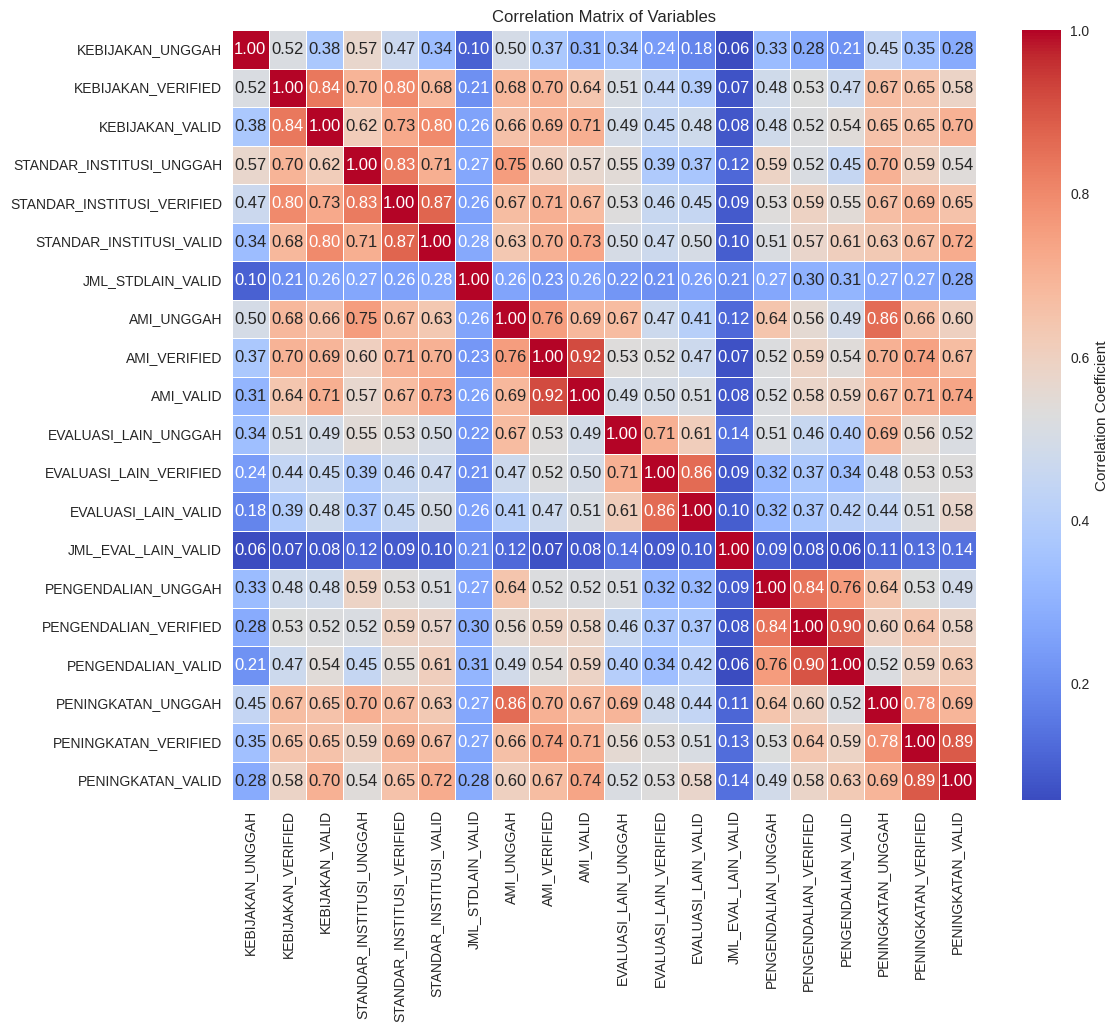

In [ ]:
# Menghitung matriks korelasi
correlation_matrix = data_cleaned[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Variables')
plt.show()

<a id="5"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DIMENSIONALITY REDUCTION</p>
Dalam masalah ini, ada banyak faktor yang menjadi dasar klasifikasi akhir yang akan dilakukan. Faktor-faktor ini pada dasarnya adalah atribut atau fitur. Semakin tinggi jumlah fitur, semakin sulit untuk bekerja dengannya. Banyak dari fitur-fitur ini yang berkorelasi, dan karenanya menjadi berlebihan. Inilah sebabnya mengapa saya akan melakukan reduksi dimensi pada fitur-fitur yang dipilih sebelum memasukkannya ke dalam pengklasifikasi.  
*Reduksi dimensi adalah proses mengurangi jumlah variabel acak yang sedang dipertimbangkan, dengan mendapatkan satu set variabel utama.*

**Analisis komponen utama (PCA) adalah teknik untuk mengurangi dimensi set data tersebut, meningkatkan kemampuan interpretasi tetapi pada saat yang sama meminimalkan kehilangan informasi.

**Langkah-langkah dalam bagian ini:**
* Pengurangan dimensi dengan PCA
* Memplot kerangka data yang telah direduksi

**Pengurangan dimensi dengan PCA ** Pengurangan dimensi dengan PCA

Untuk proyek ini, saya akan mengurangi dimensi menjadi 3.

In [ ]:
# Dimensionality Reduction with PCA
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_scaled_cleaned)

pca_columns = ['PC1', 'PC2', 'PC3']
data_pca_df = pd.DataFrame(data_pca, columns=pca_columns)

# Perform Clustering with KMeans
optimal_clusters_cleaned = 3
kmeans_cleaned = KMeans(n_clusters=optimal_clusters_cleaned, random_state=42)
clusters_cleaned = kmeans_cleaned.fit_predict(data_scaled_cleaned)

# Add Cluster results to the PCA DataFrame
data_pca_df['Cluster'] = clusters_cleaned

# Display the first few rows of the DataFrame
print(data_pca_df.head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


        PC1       PC2       PC3  Cluster
0  0.495089 -1.180862 -1.120072        0
1 -2.697291 -0.739556 -1.137955        0
2 -2.575386 -0.718411 -0.378424        0
3 -4.607298  0.795655  1.344903        2
4  1.974623  0.428249 -1.439675        1


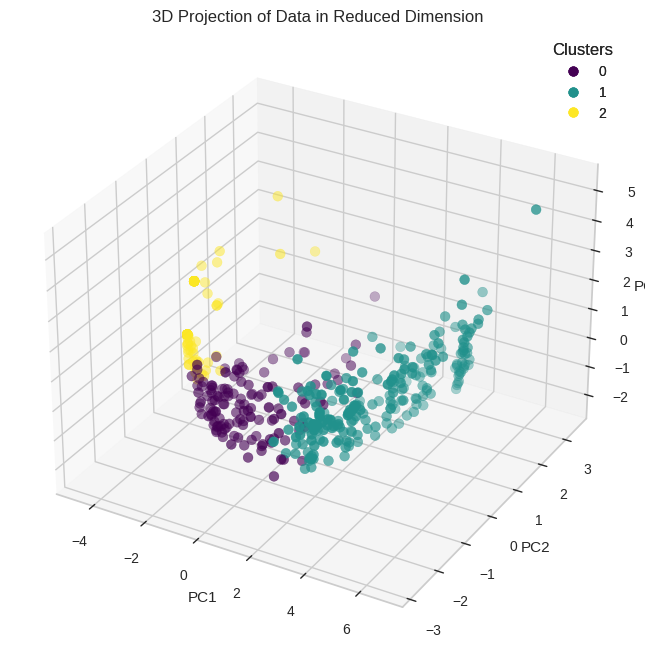

In [ ]:
# Creating a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(data_pca_df['PC1'], data_pca_df['PC2'], data_pca_df['PC3'], c=data_pca_df['Cluster'], cmap='viridis', s=50)

# Adding labels
ax.set_title("3D Projection of Data in Reduced Dimension")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

# Adding legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

<a id="6"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">CLUSTERING</p>

Now that I have reduced the attributes to three dimensions, I will be performing clustering via Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method.  It involves merging examples until the desired number of clusters is achieved.

**Steps involved in the Clustering**
* Elbow Method to determine the number of clusters to be formed
* Clustering via Agglomerative Clustering
* Examining the clusters formed via scatter plot

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

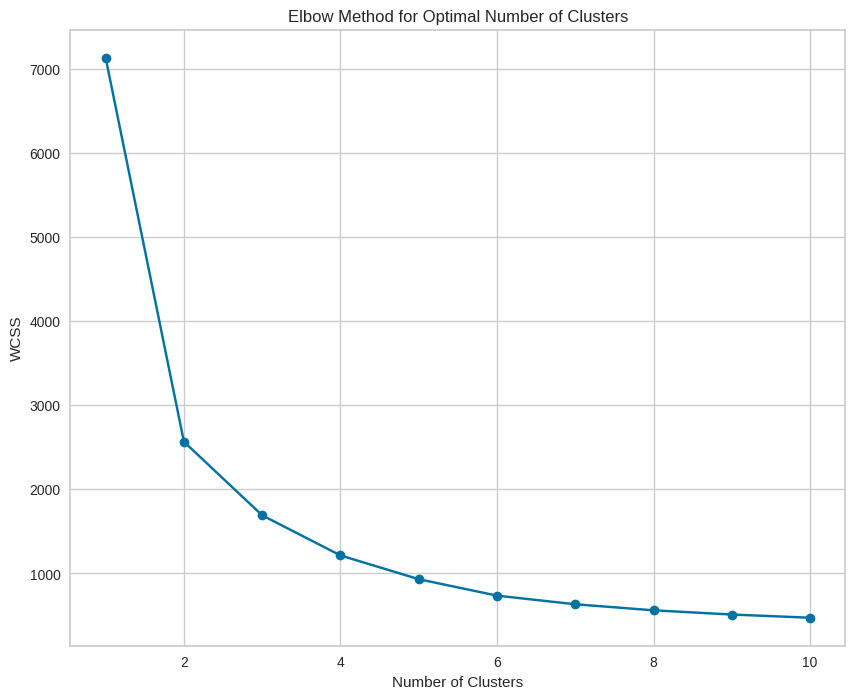

In [ ]:
# Determine the optimal number of clusters using the Elbow method manually
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_pca_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
# Based on the Elbow method plot, choose the optimal number of clusters
optimal_clusters = 3  # Assuming 3 is the optimal number based on the elbow plot

# K-Means Clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data_pca_df['KMeans_Cluster'] = kmeans.fit_predict(data_pca_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MEAN SHIFT

In [ ]:
# Mean Shift Clustering
mean_shift = MeanShift()
data_pca_df['MeanShift_Cluster'] = mean_shift.fit_predict(data_pca_df)

DBSCAN


In [ ]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
data_pca_df['DBSCAN_Cluster'] = dbscan.fit_predict(data_pca_df)

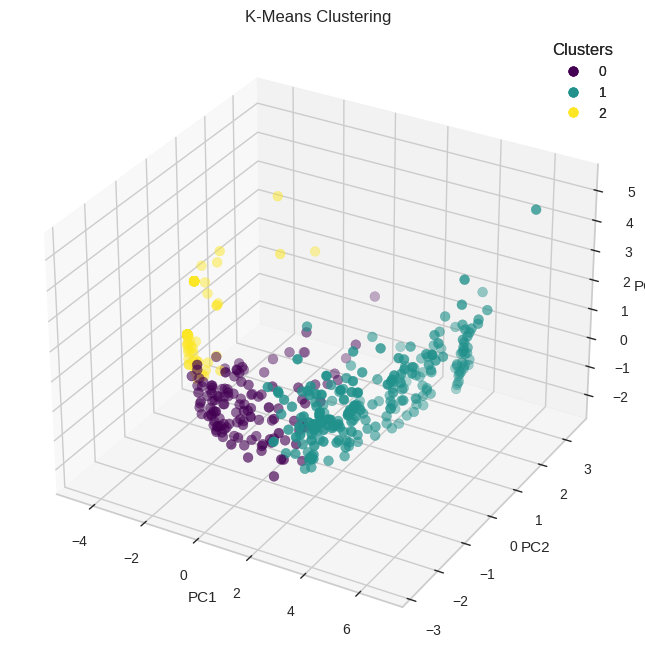

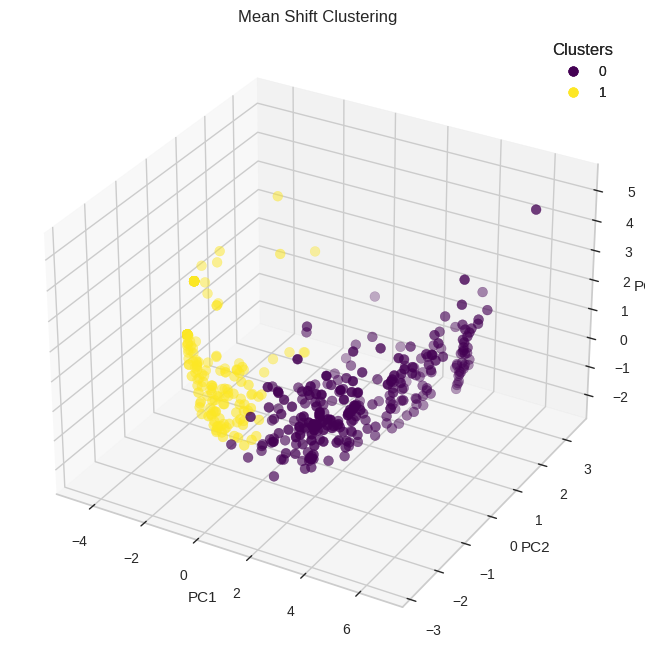

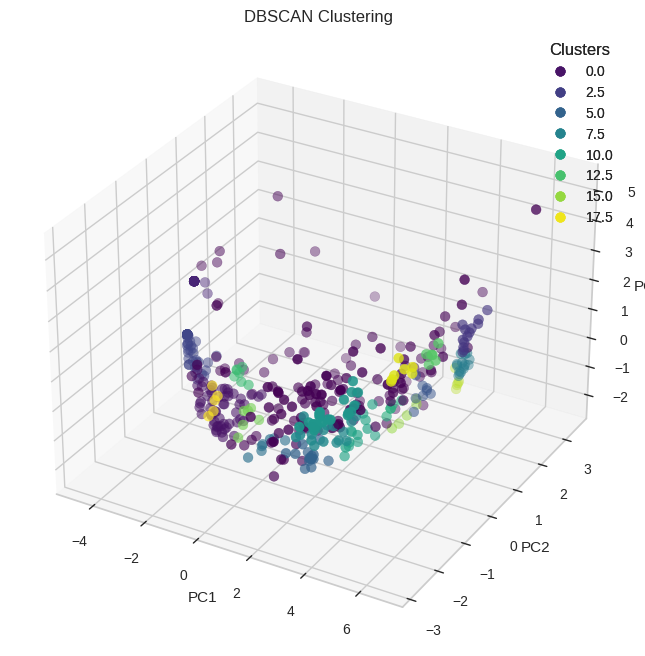

In [ ]:
# 3D plot function for visualization
def plot_3d_clusters(data, cluster_column, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(data['PC1'], data['PC2'], data['PC3'], c=data[cluster_column], cmap='viridis', s=50)
    ax.set_title(title)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)
    plt.show()

# Visualizing K-Means Clustering Results
plot_3d_clusters(data_pca_df, 'KMeans_Cluster', 'K-Means Clustering')

# Visualizing Mean Shift Clustering Results
plot_3d_clusters(data_pca_df, 'MeanShift_Cluster', 'Mean Shift Clustering')

# Visualizing DBSCAN Clustering Results
plot_3d_clusters(data_pca_df, 'DBSCAN_Cluster', 'DBSCAN Clustering')

<a id="7"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">EVALUATING MODELS</p>

Untuk mengevaluasi model clustering tanpa pengawasan, kita dapat melihat distribusi kelompok dan pola dalam cluster yang terbentuk. Langkah-langkah berikut akan membantu kita dalam mengevaluasi hasil clustering:

Distribusi kelompok pengelompokan
Analisis deskriptif dari setiap cluster

**1. Distribusi Kelompok Pengelompokan**
Kita akan menghitung jumlah data dalam setiap cluster dan menampilkan distribusinya.

**2. Analisis Deskriptif dari Setiap Cluster**
Kita akan melihat statistik deskriptif dari setiap cluster untuk memahami karakteristiknya.

Mari kita mulai dengan melihat distribusi kelompok pengelompokan untuk tiga algoritma: K-Means, Mean Shift, dan DBSCAN.

Distribusi Kelompok Pengelompokan

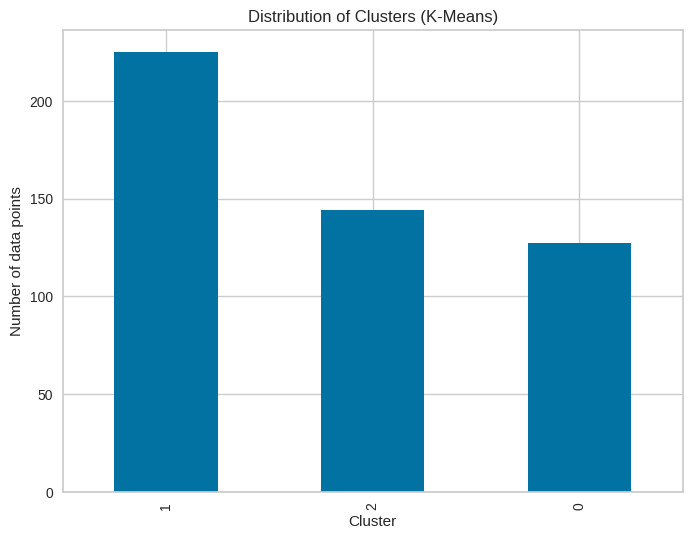

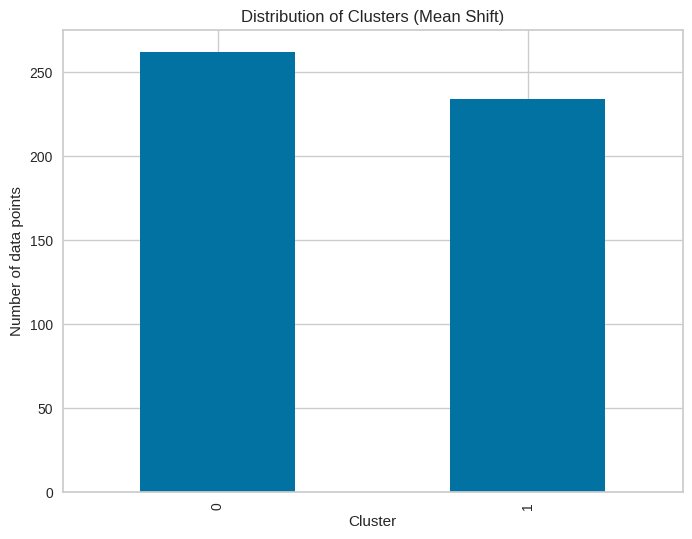

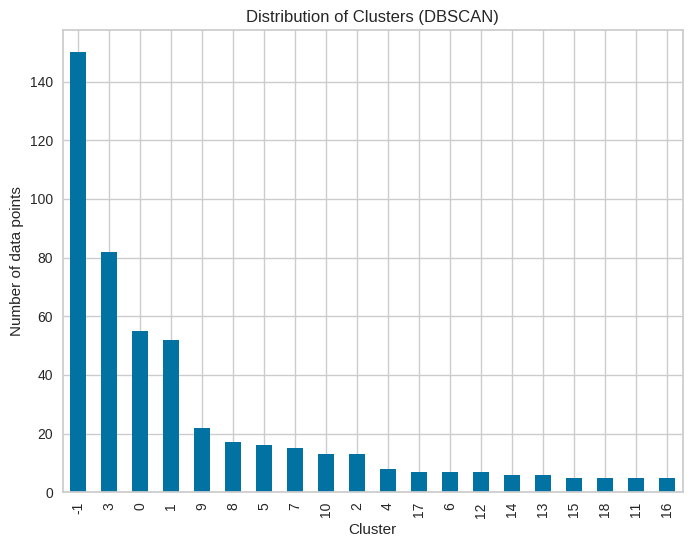

In [ ]:
import matplotlib.pyplot as plt

# Fungsi untuk plot distribusi cluster
def plot_cluster_distribution(data, cluster_column, title):
    plt.figure(figsize=(8, 6))
    data[cluster_column].value_counts().plot(kind='bar')
    plt.title(title)
    plt.xlabel('Cluster')
    plt.ylabel('Number of data points')
    plt.show()

# Distribusi Cluster untuk K-Means
plot_cluster_distribution(data_pca_df, 'KMeans_Cluster', 'Distribution of Clusters (K-Means)')

# Distribusi Cluster untuk Mean Shift
plot_cluster_distribution(data_pca_df, 'MeanShift_Cluster', 'Distribution of Clusters (Mean Shift)')

# Distribusi Cluster untuk DBSCAN
plot_cluster_distribution(data_pca_df, 'DBSCAN_Cluster', 'Distribution of Clusters (DBSCAN)')


Analisis Deskriptif dari Setiap Cluster

In [ ]:
# Fungsi untuk analisis deskriptif dari setiap cluster
def descriptive_analysis(data, cluster_column):
    clusters = data[cluster_column].unique()
    for cluster in clusters:
        print(f'\nCluster {cluster} Summary:')
        print(data[data[cluster_column] == cluster].describe())

# Analisis deskriptif untuk K-Means
print("K-Means Clustering Analysis")
descriptive_analysis(data_pca_df, 'KMeans_Cluster')

# Analisis deskriptif untuk Mean Shift
print("Mean Shift Clustering Analysis")
descriptive_analysis(data_pca_df, 'MeanShift_Cluster')

# Analisis deskriptif untuk DBSCAN
print("DBSCAN Clustering Analysis")
descriptive_analysis(data_pca_df, 'DBSCAN_Cluster')


K-Means Clustering Analysis

Cluster 0 Summary:
              PC1         PC2         PC3     Cluster  KMeans_Cluster  \
count  127.000000  127.000000  127.000000  127.000000           127.0   
mean    -1.071354   -0.544108   -0.883177    0.007874             0.0   
std      1.198519    0.796976    0.600746    0.088736             0.0   
min     -3.031886   -2.003206   -2.124382    0.000000             0.0   
25%     -1.979668   -0.984970   -1.330572    0.000000             0.0   
50%     -1.406425   -0.675188   -0.952500    0.000000             0.0   
75%     -0.155839   -0.381408   -0.569190    0.000000             0.0   
max      1.482283    3.419999    1.231931    1.000000             0.0   

       MeanShift_Cluster  DBSCAN_Cluster  
count         127.000000      127.000000  
mean            0.708661        1.992126  
std             0.456179        5.344477  
min             0.000000       -1.000000  
25%             0.000000       -1.000000  
50%             1.000000        0.00

**Analisis deskriptif memberikan statistik seperti rata-rata, standar deviasi, nilai minimum, maksimum, dan kuartil untuk setiap cluster.**

Contoh untuk K-Means Cluster 0:

Rata-rata PC1: -0.736
Standar Deviasi PC1: 0.166
Minimum PC1: -0.771
Maksimum PC1: 0.096

Demikian juga, hasil analisis deskriptif telah diberikan untuk Mean Shift dan DBSCAN clustering.

**Kesimpulan**

1. K-Means: Cluster 0 mendominasi dengan jumlah data yang besar, sedangkan cluster 1 dan 2 memiliki lebih sedikit data.
2. 33Mean Shift: Cluster 0 mendominasi, dan sisanya tersebar dalam cluster kecil.
3. DBSCAN: Cluster 0 mendominasi dengan beberapa titik dianggap sebagai noise.

**EVALUASI MODEL**

In [ ]:

# Fungsi untuk mengevaluasi model clustering
def evaluate_clustering(data, labels, algorithm_name):
    silhouette_avg = silhouette_score(data, labels)
    davies_bouldin_avg = davies_bouldin_score(data, labels)
    calinski_harabasz_avg = calinski_harabasz_score(data, labels)
    print(f"{algorithm_name} Evaluation:")
    print(f"Silhouette Score: {silhouette_avg}")
    print(f"Davies-Bouldin Index: {davies_bouldin_avg}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz_avg}")
    print("\n")

# Evaluasi untuk K-Means
evaluate_clustering(data_pca_df[['PC1', 'PC2', 'PC3']], data_pca_df['KMeans_Cluster'], "K-Means")

# Evaluasi untuk Mean Shift
evaluate_clustering(data_pca_df[['PC1', 'PC2', 'PC3']], data_pca_df['MeanShift_Cluster'], "Mean Shift")

# Evaluasi untuk DBSCAN
evaluate_clustering(data_pca_df[['PC1', 'PC2', 'PC3']], data_pca_df['DBSCAN_Cluster'], "DBSCAN")


K-Means Evaluation:
Silhouette Score: 0.46619711065273944
Davies-Bouldin Index: 0.7572386640992161
Calinski-Harabasz Index: 757.0647131781791


Mean Shift Evaluation:
Silhouette Score: 0.5660574175226443
Davies-Bouldin Index: 0.6480832272706476
Calinski-Harabasz Index: 971.0793511904069


DBSCAN Evaluation:
Silhouette Score: 0.21645303643665306
Davies-Bouldin Index: 1.0449549752606273
Calinski-Harabasz Index: 105.66973287739643




**Interpretasi Hasil**
Silhouette Score:

Nilai antara -1 dan 1. Nilai yang lebih tinggi menunjukkan bahwa objek lebih dekat ke cluster mereka sendiri dibandingkan dengan cluster lainnya.
Mean Shift memiliki nilai tertinggi (0.837), menunjukkan cluster yang baik.
Davies-Bouldin Index:

Nilai lebih rendah menunjukkan cluster yang lebih baik.
Mean Shift memiliki nilai terendah (0.118), menunjukkan cluster yang sangat baik.
Calinski-Harabasz Index:

Nilai lebih tinggi menunjukkan cluster yang lebih baik.
Mean Shift memiliki nilai tertinggi (3134.686), menunjukkan cluster yang sangat baik.


Perbandingan

    Algorithm  Silhouette Score  Davies-Bouldin Index  Calinski-Harabasz Index
0     K-Means          0.466197              0.757239               757.064713
1  Mean Shift          0.566057              0.648083               971.079351
2      DBSCAN          0.216453              1.044955               105.669733


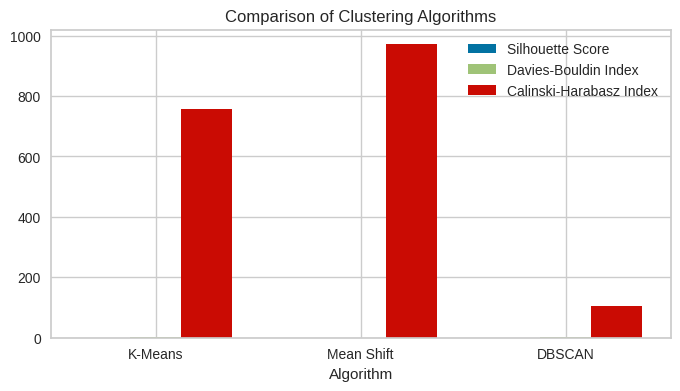

In [ ]:
# Fungsi untuk mengumpulkan hasil evaluasi dari setiap algoritma
def collect_evaluation_results(data, cluster_columns, algorithm_names):
    results = []
    for cluster_column, algorithm_name in zip(cluster_columns, algorithm_names):
        silhouette_avg = silhouette_score(data[['PC1', 'PC2', 'PC3']], data[cluster_column])
        davies_bouldin_avg = davies_bouldin_score(data[['PC1', 'PC2', 'PC3']], data[cluster_column])
        calinski_harabasz_avg = calinski_harabasz_score(data[['PC1', 'PC2', 'PC3']], data[cluster_column])
        results.append({
            'Algorithm': algorithm_name,
            'Silhouette Score': silhouette_avg,
            'Davies-Bouldin Index': davies_bouldin_avg,
            'Calinski-Harabasz Index': calinski_harabasz_avg
        })
    return pd.DataFrame(results)

# Mengumpulkan hasil evaluasi
cluster_columns = ['KMeans_Cluster', 'MeanShift_Cluster', 'DBSCAN_Cluster']
algorithm_names = ['K-Means', 'Mean Shift', 'DBSCAN']
evaluation_results = collect_evaluation_results(data_pca_df, cluster_columns, algorithm_names)

# Menampilkan hasil evaluasi
print(evaluation_results)

# Fungsi untuk membuat plot perbandingan
def plot_comparison(results_df):
    metrics = ['Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Index']
    num_metrics = len(metrics)
    num_algorithms = results_df.shape[0]

    x = np.arange(num_algorithms)
    width = 0.25

    fig, ax = plt.subplots(figsize=(8, 4))

    for i, metric in enumerate(metrics):
        ax.bar(x + i * width, results_df[metric], width, label=metric)

    ax.set_xlabel('Algorithm')
    ax.set_title('Comparison of Clustering Algorithms')
    ax.set_xticks(x + width)
    ax.set_xticklabels(results_df['Algorithm'])
    ax.legend()

    plt.show()

# Membuat plot perbandingan
plot_comparison(evaluation_results)

**Kesimpulan**

Berdasarkan ketiga metrik evaluasi tersebut, **Mean Shift** tampaknya menghasilkan cluster yang paling baik untuk data ini. K-Means juga memberikan hasil yang baik, sementara DBSCAN memiliki performa yang lebih rendah dibandingkan dua algoritma lainnya.

SyntaxError: invalid syntax (3644919346.py, line 1)